<a href="https://colab.research.google.com/github/alfonharyos/dts_porto/blob/main/cnn_image_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Challenge

In [ ]:
# If additional packages are needed but are not installed by default, uncomment the last two lines of this cell
# and replace <package list> with a list of additional packages.
# This will ensure the notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

In [ ]:
import sys
!{sys.executable} -m pip install wget
!{sys.executable} -m pip install shutil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil


In [ ]:
# Libraries
import pandas as pd
import os
from shutil import unpack_archive
pd.set_option("display.max_columns", 101)

## Dataset

In [ ]:
# Run this cell block to download and extract image data
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/8c7bc0c59ee6bcdb3646a1997606a9d0/test.zip'
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/ffe8804da24b94ee410a8730ba297dfc/train_0.zip'
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/5460fcc87e2d7f7e19c17f719e0df00a/train_1.zip'

print('Extracting Train Dataset : Label 1')
unpack_archive('train_1.zip', '')

print('Extracting Train Dataset : Label 0')
unpack_archive('train_0.zip', '')

print('Extracting Test Dataset')
unpack_archive('test.zip', '')

print('Dataset Extracted')


os.remove('train_1.zip')
os.remove('train_0.zip')
os.remove('test.zip')
print('Extra Files Removed')

--2022-06-21 12:29:39--  https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/8c7bc0c59ee6bcdb3646a1997606a9d0/test.zip
Resolving hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)... 52.216.108.203
Connecting to hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)|52.216.108.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58948996 (56M) [application/zip]
Saving to: ‘test.zip’

test.zip            100%[===================>]  56.22M  12.6MB/s    in 5.6s    

2022-06-21 12:29:46 (9.96 MB/s) - ‘test.zip’ saved [58948996/58948996]

--2022-06-21 12:29:46--  https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/ffe8804da24b94ee410a8730ba297dfc/train_0.zip
Resolving hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)... 52.216.41.233
Connecting to hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)|52.216.41.233|:443... co

## Data Description

Column | Description
:---|:---
`file` | Image name
`label` | Target Label (1/0)

In [ ]:
# # The train label dataset is already loaded below
# data = pd.read_csv("train_labels.csv")

In [ ]:
# data.head()

In [ ]:
train_0_label = os.listdir('/content/train/0')
train_1_label = os.listdir('/content/train/1')

print('Data berlebel 0', len(train_0_label))
print('Data berlebel 1', len(train_1_label))

Data berlebel 0 2026
Data berlebel 1 1989


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      height_shift_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      validation_split=0.1,)

In [ ]:
# Preprocess Data

train_generator = train_datagen.flow_from_directory(
    "/content/train",
    target_size=(300,300),
    batch_size = 32,
    class_mode = "binary",
    subset = "training"
)

val_generator = train_datagen.flow_from_directory(
    "/content/train",
    target_size=(300,300),
    batch_size = 32,
    class_mode = "binary",
    subset = "validation"
)

Found 3615 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


## Machine Learning

Build a neural network that can classify the driver’s behaviour.
- **The model's performance will be evaluated on the basis of accuracy.**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(300, 300, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 296, 296, 16)      1216      
                                                                 
 batch_normalization (BatchN  (None, 296, 296, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 148, 148, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 146, 146, 32)     1

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001), loss="binary_crossentropy", metrics = ["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
# from keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(min_delta = 0.001, mode = 'min', monitor='val_loss', patience = 7)
# callbacks = [early_stopping]

In [ ]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<0.1):
      self.model.stop_training = True
callbacks = mycallback()

In [ ]:
# Fit model

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    validation_steps=5,
    callbacks=[callbacks]
    )

Epoch 1/50
113/113 [==============================] - 96s 796ms/step - loss: 0.7866 - accuracy: 0.5986 - val_loss: 1.2313 - val_accuracy: 0.5000
Epoch 2/50
113/113 [==============================] - 104s 922ms/step - loss: 0.6542 - accuracy: 0.6622 - val_loss: 1.2917 - val_accuracy: 0.4812
Epoch 3/50
113/113 [==============================] - 88s 781ms/step - loss: 0.5785 - accuracy: 0.7159 - val_loss: 0.6983 - val_accuracy: 0.5437
Epoch 4/50
113/113 [==============================] - 86s 764ms/step - loss: 0.4962 - accuracy: 0.7615 - val_loss: 0.8285 - val_accuracy: 0.5562
Epoch 5/50
113/113 [==============================] - 87s 773ms/step - loss: 0.4365 - accuracy: 0.7953 - val_loss: 0.8321 - val_accuracy: 0.6625
Epoch 6/50
113/113 [==============================] - 100s 890ms/step - loss: 0.4114 - accuracy: 0.8147 - val_loss: 1.2526 - val_accuracy: 0.5437
Epoch 7/50
113/113 [==============================] - 95s 843ms/step - loss: 0.3482 - accuracy: 0.8528 - val_loss: 0.8100 - val_

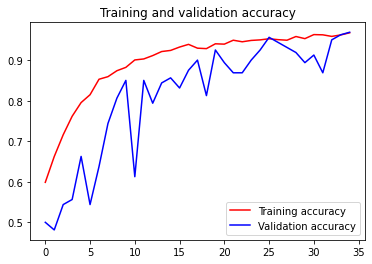

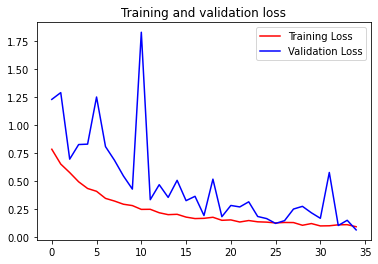

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each image in the test folder, predict the value of the label (0/1). You should submit a CSV file with a header row and one row per test entry. 

The file (`submissions.csv`) should have exactly 2 columns:
   - **file**
   - **label**
   

In [ ]:
import numpy as np
from keras.preprocessing import image

def test_image (im):
  path = '/content/test/' + im
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=1)
  return round(classes[0][0])

In [ ]:
test_data = os.listdir('/content/test/')

In [ ]:
len(test_data)

1401

In [ ]:
new_test_data = []
for i in test_data:
  if 'jpg' in i:
    new_test_data.append(i)

In [ ]:
len(new_test_data)

1400

In [ ]:
label = []
for i in new_test_data: 
    label.append(test_image(i))

In [ ]:
import pandas as pd

result = {'File':new_test_data,'Label':label}
submission_df = pd.DataFrame(result)

submission_df.head()

,File,Label
0,img_64030.jpg,1
1,img_60142.jpg,0
2,img_11658.jpg,1
3,img_49198.jpg,0
4,img_12773.jpg,0


In [ ]:
#Submission
# submission_df.to_csv('submissions.csv',index=False)
submission_df.to_csv('152236035101-664.csv',index=False)